## NAMA: Mohammad Rafi Adithama
## NIM: 2209106041
### Posttest 5 Kecerdasan Buatan
# ________________________________________________________________________________________

# A. Supervised Learning

#### Disini kita import library yang kita ingin gunakan dalam analisis data ini

In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#### kita tarik dataset dan kita tampilkan dataset

In [2]:
data = pd.read_csv('bodyPerformance.csv')
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


#### Pisahkan fitur (X) dan label (y) lalu Bagi dataset menjadi data latih dan data uji

In [12]:
X = data[['height_cm', 'weight_kg', 'body fat_%']]
y = data['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Inisialisasi model Linear Regression dan  Latih model dengan data latih


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Prediksi label pada data uji dan Menghitung MSE, RMSE MAE dan R2 lalu kita print hasilnya

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 163.48099520096767
Root Mean Squared Error (RMSE): 12.785968684498162
Mean Absolute Error (MAE): 10.798000111966937
R-squared (R2): 0.10645015542257064


#### lalu kita buat grafiknya, terlihat nilai fakta lumayan tinggi dengan melewati frekuensi 350, sedangkan data prediksi tidak sampai menyentuh 350.

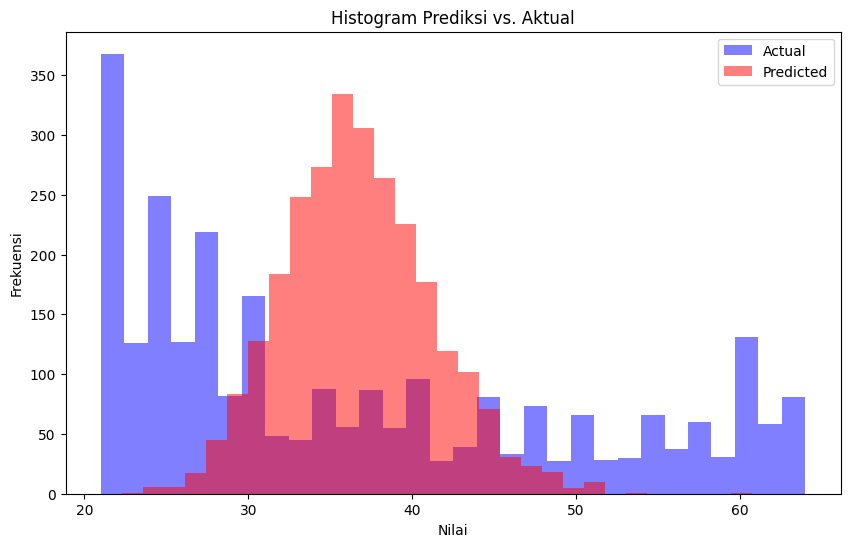

In [28]:
actual = y_test
predicted = y_pred
plt.figure(figsize=(10, 6))
plt.hist(actual, bins=30, alpha=0.5, label='Actual', color='b')
plt.hist(predicted, bins=30, alpha=0.5, label='Predicted', color='r')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend(loc='upper right')
plt.title('Histogram Prediksi vs. Aktual')
plt.show()

# B. Unsupervised Learning

#### Membaca dataset, Pisahkan fitur yang akan digunakan untuk K-Means dan # Tentukan nilai K

In [19]:
data1 = pd.read_csv('bodyPerformance.csv')
X = data1[['height_cm', 'weight_kg', 'body fat_%']]
K = 3  

#### Inisialisasi model K-Means dan melakukan clustering pada dataset

In [20]:
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)

C:\Users\praktek\Documents\venv_A1_22\joy_014\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

#### # Menambahkan label kluster ke dataset dan Menghitung jumlah data dalam setiap kluster


In [26]:
data['kluster'] = kmeans.labels_
kluster_counts = data['kluster'].value_counts().sort_index()

#### terlihat dalam grafik, dari kluster 0,1,2 grafiknya meningkat naik. data 0= 3000+, data 1= 4000+ dan data 2= 5000+

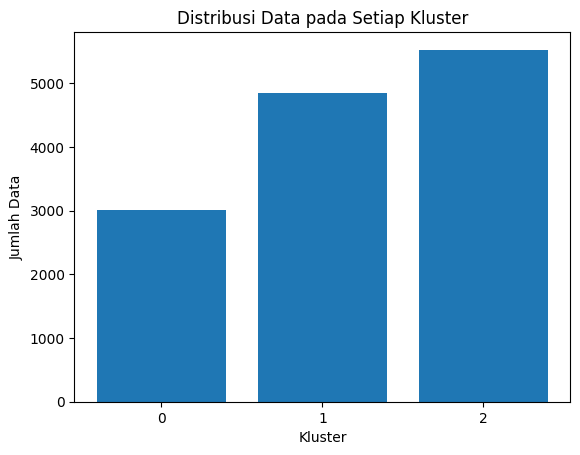

In [27]:
plt.bar(kluster_counts.index, kluster_counts.values)
plt.xlabel('Kluster')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Data pada Setiap Kluster')
plt.xticks(kluster_counts.index)
plt.show()